In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [2]:
dataset_folder = './data/train/'
subfolders = os.listdir(dataset_folder)
print(subfolders)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [3]:
i = 0
last = []
images = []
labels = []
temp = subfolders

In [4]:
for subfolder in subfolders:
    subfolder_index = temp.index(subfolder)
    path = dataset_folder + subfolder
    image_files = os.listdir(path)
    for image in image_files:
        image_path = path + '/' + image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (48, 48))
        images.append(image)
        labels.append(subfolder_index)
        i+=1
    last.append(i)
images_x = np.array(images)
labels_y = np.array(labels) 

images_x = images_x / 255.0
num_of_classes = len(subfolders)
labels_y = tf.keras.utils.to_categorical(labels_y, num_of_classes)
       

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images_x, labels_y, test_size=0.2, random_state=42)

In [6]:
input = Input(shape=(48,48,1))
conv1 = Conv2D(64,(3,3),padding='same',strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)
conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)
conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)
conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)
flatten = Flatten()(pool4)
dense_1 = Dense(128,activation='relu')(flatten)
drop_1 = Dropout(0.2)(dense_1)
output = Dense(7,activation="softmax")(drop_1)

In [7]:
model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 702,535 (2.68 MB)

 Trainable params: 702,535 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
fle_s='./output_new/emotion_model.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch') 
callback_list=[checkpointer]

In [9]:
save = model.fit(X_train,y_train,batch_size=32,validation_data=(X_test,y_test),epochs=50,callbacks=[callback_list])

Epoch 1/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.2391 - loss: 1.9213
Epoch 1: loss improved from None to 1.85863, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 85s 110ms/step - accuracy: 0.2407 - loss: 1.8586 - val_accuracy: 0.2467 - val_loss: 1.8188
Epoch 2/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.2419 - loss: 1.8099
Epoch 2: loss improved from 1.85863 to 1.78886, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 78s 106ms/step - accuracy: 0.2643 - loss: 1.7889 - val_accuracy: 0.3120 - val_loss: 1.7529
Epoch 3/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.3421 - loss: 1.6986
Epoch 3: loss improved from 1.78886 to 1.66947, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 69s 93ms/step - accuracy: 0.3520 - loss: 1.6695 - val_accuracy: 0.3622 - val_loss: 1.6210
Epoch 4/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.3850 - loss: 1.5966
Epoch 4: loss improved from 1.66947 to 1.58913, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 69s 93ms/step - accuracy: 0.3885 - loss: 1.5891 - val_accuracy: 0.4116 - val_loss: 1.5646
Epoch 5/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.4042 - loss: 1.5556
Epoch 5: loss improved from 1.58913 to 1.54391, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 68s 92ms/step - accuracy: 0.4123 - loss: 1.5439 - val_accuracy: 0.4360 - val_loss: 1.5217
Epoch 6/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4244 - loss: 1.5152
Epoch 6: loss improved from 1.54391 to 1.51183, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 68s 92ms/step - accuracy: 0.4252 - loss: 1.5118 - val_accuracy: 0.4390 - val_loss: 1.4881
Epoch 7/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4352 - loss: 1.4844
Epoch 7: loss improved from 1.51183 to 1.48289, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 70s 94ms/step - accuracy: 0.4381 - loss: 1.4829 - val_accuracy: 0.4380 - val_loss: 1.4898
Epoch 8/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4412 - loss: 1.4829
Epoch 8: loss improved from 1.48289 to 1.46451, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 69s 93ms/step - accuracy: 0.4472 - loss: 1.4645 - val_accuracy: 0.4568 - val_loss: 1.4605
Epoch 9/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4501 - loss: 1.4509
Epoch 9: loss improved from 1.46451 to 1.44347, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 74s 100ms/step - accuracy: 0.4562 - loss: 1.4435 - val_accuracy: 0.4679 - val_loss: 1.4382
Epoch 10/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4620 - loss: 1.4213
Epoch 10: loss improved from 1.44347 to 1.42209, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 73s 99ms/step - accuracy: 0.4650 - loss: 1.4221 - val_accuracy: 0.4736 - val_loss: 1.4155
Epoch 11/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.4778 - loss: 1.3978
Epoch 11: loss improved from 1.42209 to 1.40035, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 86s 117ms/step - accuracy: 0.4782 - loss: 1.4004 - val_accuracy: 0.4780 - val_loss: 1.4070
Epoch 12/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.4895 - loss: 1.3758
Epoch 12: loss improved from 1.40035 to 1.38035, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 88s 119ms/step - accuracy: 0.4885 - loss: 1.3804 - val_accuracy: 0.4750 - val_loss: 1.3979
Epoch 13/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5001 - loss: 1.3578
Epoch 13: loss improved from 1.38035 to 1.36674, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 71s 96ms/step - accuracy: 0.4973 - loss: 1.3667 - val_accuracy: 0.4908 - val_loss: 1.3783
Epoch 14/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5040 - loss: 1.3459
Epoch 14: loss improved from 1.36674 to 1.34800, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 72s 97ms/step - accuracy: 0.5052 - loss: 1.3480 - val_accuracy: 0.4872 - val_loss: 1.3908
Epoch 15/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5100 - loss: 1.3386
Epoch 15: loss improved from 1.34800 to 1.33907, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 71s 96ms/step - accuracy: 0.5092 - loss: 1.3391 - val_accuracy: 0.4852 - val_loss: 1.4030
Epoch 16/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5153 - loss: 1.3283
Epoch 16: loss improved from 1.33907 to 1.32776, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 70s 95ms/step - accuracy: 0.5141 - loss: 1.3278 - val_accuracy: 0.4970 - val_loss: 1.3624
Epoch 17/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5198 - loss: 1.3186
Epoch 17: loss improved from 1.32776 to 1.31507, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 71s 96ms/step - accuracy: 0.5189 - loss: 1.3151 - val_accuracy: 0.5036 - val_loss: 1.3575
Epoch 18/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5374 - loss: 1.2856
Epoch 18: loss improved from 1.31507 to 1.30012, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 70s 95ms/step - accuracy: 0.5303 - loss: 1.3001 - val_accuracy: 0.5018 - val_loss: 1.3615
Epoch 19/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5331 - loss: 1.2808
Epoch 19: loss improved from 1.30012 to 1.29009, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 76s 104ms/step - accuracy: 0.5291 - loss: 1.2901 - val_accuracy: 0.5020 - val_loss: 1.3544
Epoch 20/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.5373 - loss: 1.2758
Epoch 20: loss improved from 1.29009 to 1.28126, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 90s 122ms/step - accuracy: 0.5375 - loss: 1.2813 - val_accuracy: 0.5103 - val_loss: 1.3526
Epoch 21/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5465 - loss: 1.2635
Epoch 21: loss improved from 1.28126 to 1.27401, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 84s 114ms/step - accuracy: 0.5419 - loss: 1.2740 - val_accuracy: 0.5079 - val_loss: 1.3598
Epoch 22/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.5452 - loss: 1.2628
Epoch 22: loss improved from 1.27401 to 1.26156, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 83s 113ms/step - accuracy: 0.5457 - loss: 1.2616 - val_accuracy: 0.5137 - val_loss: 1.3472
Epoch 23/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.5584 - loss: 1.2349
Epoch 23: loss improved from 1.26156 to 1.25340, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 88s 119ms/step - accuracy: 0.5523 - loss: 1.2534 - val_accuracy: 0.5194 - val_loss: 1.3333
Epoch 24/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5601 - loss: 1.2378
Epoch 24: loss improved from 1.25340 to 1.24168, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 94s 127ms/step - accuracy: 0.5570 - loss: 1.2417 - val_accuracy: 0.5152 - val_loss: 1.3520
Epoch 25/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.5619 - loss: 1.2247
Epoch 25: loss improved from 1.24168 to 1.23408, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 84s 114ms/step - accuracy: 0.5570 - loss: 1.2341 - val_accuracy: 0.5196 - val_loss: 1.3488
Epoch 26/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5731 - loss: 1.2113
Epoch 26: loss improved from 1.23408 to 1.22552, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 79s 107ms/step - accuracy: 0.5664 - loss: 1.2255 - val_accuracy: 0.5138 - val_loss: 1.3418
Epoch 27/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5729 - loss: 1.2037
Epoch 27: loss improved from 1.22552 to 1.21918, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 73s 98ms/step - accuracy: 0.5694 - loss: 1.2192 - val_accuracy: 0.5086 - val_loss: 1.3777
Epoch 28/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5720 - loss: 1.2081
Epoch 28: loss improved from 1.21918 to 1.20927, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 81s 109ms/step - accuracy: 0.5706 - loss: 1.2093 - val_accuracy: 0.5106 - val_loss: 1.3571
Epoch 29/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.5809 - loss: 1.1894
Epoch 29: loss improved from 1.20927 to 1.20429, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 90s 122ms/step - accuracy: 0.5748 - loss: 1.2043 - val_accuracy: 0.5221 - val_loss: 1.3353
Epoch 30/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5765 - loss: 1.1948
Epoch 30: loss improved from 1.20429 to 1.19791, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 77s 104ms/step - accuracy: 0.5731 - loss: 1.1979 - val_accuracy: 0.5269 - val_loss: 1.3337
Epoch 31/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5798 - loss: 1.1894
Epoch 31: loss improved from 1.19791 to 1.19243, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 76s 103ms/step - accuracy: 0.5751 - loss: 1.1924 - val_accuracy: 0.5179 - val_loss: 1.3513
Epoch 32/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5844 - loss: 1.1821
Epoch 32: loss improved from 1.19243 to 1.19108, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 74s 101ms/step - accuracy: 0.5818 - loss: 1.1911 - val_accuracy: 0.5153 - val_loss: 1.3552
Epoch 33/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5831 - loss: 1.1800
Epoch 33: loss improved from 1.19108 to 1.18150, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 74s 101ms/step - accuracy: 0.5823 - loss: 1.1815 - val_accuracy: 0.5230 - val_loss: 1.3475
Epoch 34/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5929 - loss: 1.1714
Epoch 34: loss improved from 1.18150 to 1.17526, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 79s 107ms/step - accuracy: 0.5867 - loss: 1.1753 - val_accuracy: 0.5215 - val_loss: 1.3470
Epoch 35/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5965 - loss: 1.1535
Epoch 35: loss improved from 1.17526 to 1.16650, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 78s 106ms/step - accuracy: 0.5892 - loss: 1.1665 - val_accuracy: 0.5201 - val_loss: 1.3828
Epoch 36/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6016 - loss: 1.1382
Epoch 36: loss improved from 1.16650 to 1.16147, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 76s 102ms/step - accuracy: 0.5940 - loss: 1.1615 - val_accuracy: 0.5264 - val_loss: 1.3420
Epoch 37/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6035 - loss: 1.1377
Epoch 37: loss improved from 1.16147 to 1.15732, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 79s 107ms/step - accuracy: 0.5936 - loss: 1.1573 - val_accuracy: 0.5272 - val_loss: 1.3316
Epoch 38/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6094 - loss: 1.1279
Epoch 38: loss improved from 1.15732 to 1.15479, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 76s 102ms/step - accuracy: 0.5987 - loss: 1.1548 - val_accuracy: 0.5247 - val_loss: 1.3535
Epoch 39/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6025 - loss: 1.1317
Epoch 39: loss improved from 1.15479 to 1.14464, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 70s 95ms/step - accuracy: 0.5994 - loss: 1.1446 - val_accuracy: 0.5235 - val_loss: 1.3566
Epoch 40/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6051 - loss: 1.1369
Epoch 40: loss improved from 1.14464 to 1.14263, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 72s 98ms/step - accuracy: 0.5998 - loss: 1.1426 - val_accuracy: 0.5326 - val_loss: 1.3438
Epoch 41/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6083 - loss: 1.1285
Epoch 41: loss improved from 1.14263 to 1.13827, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 71s 97ms/step - accuracy: 0.6024 - loss: 1.1383 - val_accuracy: 0.5269 - val_loss: 1.3659
Epoch 42/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6088 - loss: 1.1295
Epoch 42: loss improved from 1.13827 to 1.13131, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 70s 95ms/step - accuracy: 0.6070 - loss: 1.1313 - val_accuracy: 0.5267 - val_loss: 1.3570
Epoch 43/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6095 - loss: 1.1262
Epoch 43: loss improved from 1.13131 to 1.13083, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 69s 93ms/step - accuracy: 0.6039 - loss: 1.1308 - val_accuracy: 0.5264 - val_loss: 1.3543
Epoch 44/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6102 - loss: 1.1202
Epoch 44: loss did not improve from 1.13083
738/738 ━━━━━━━━━━━━━━━━━━━━ 70s 95ms/step - accuracy: 0.6062 - loss: 1.1343 - val_accuracy: 0.5252 - val_loss: 1.3489
Epoch 45/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6066 - loss: 1.1214
Epoch 45: loss improved from 1.13083 to 1.13030, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 70s 95ms/step - accuracy: 0.6071 - loss: 1.1303 - val_accuracy: 0.5323 - val_loss: 1.3472
Epoch 46/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6184 - loss: 1.1137
Epoch 46: loss improved from 1.13030 to 1.12262, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 75s 102ms/step - accuracy: 0.6110 - loss: 1.1226 - val_accuracy: 0.5343 - val_loss: 1.3487
Epoch 47/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6234 - loss: 1.0878
Epoch 47: loss improved from 1.12262 to 1.11055, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 75s 101ms/step - accuracy: 0.6167 - loss: 1.1105 - val_accuracy: 0.5218 - val_loss: 1.3629
Epoch 48/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6164 - loss: 1.1084
Epoch 48: loss did not improve from 1.11055
738/738 ━━━━━━━━━━━━━━━━━━━━ 75s 101ms/step - accuracy: 0.6167 - loss: 1.1111 - val_accuracy: 0.5287 - val_loss: 1.3600
Epoch 49/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.6212 - loss: 1.0959
Epoch 49: loss improved from 1.11055 to 1.10580, saving model to ./output_new/emotion_model.h5


738/738 ━━━━━━━━━━━━━━━━━━━━ 80s 108ms/step - accuracy: 0.6187 - loss: 1.1058 - val_accuracy: 0.5274 - val_loss: 1.3588
Epoch 50/50
737/738 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6249 - loss: 1.0869
Epoch 50: loss did not improve from 1.10580
738/738 ━━━━━━━━━━━━━━━━━━━━ 79s 107ms/step - accuracy: 0.6180 - loss: 1.1073 - val_accuracy: 0.5291 - val_loss: 1.3515


Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

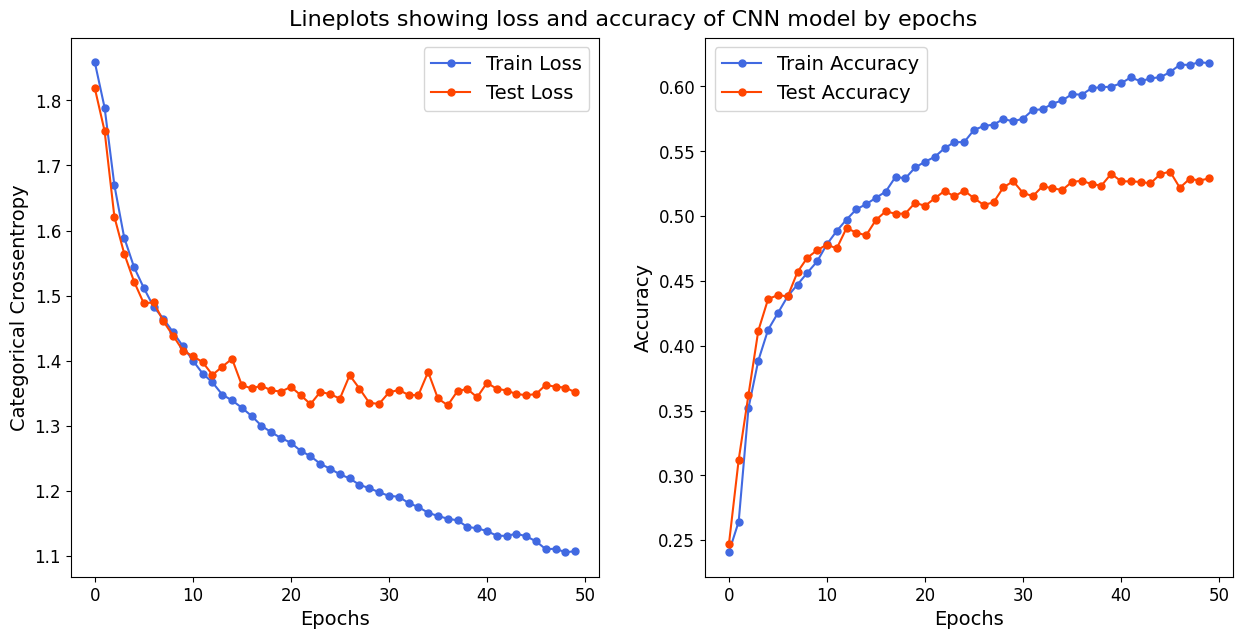

In [10]:
train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

# Plotting a line chart to visualize the loss and accuracy values by epochs.
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
ax = ax.ravel()
ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)
ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)
ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)
ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)
ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)
fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

In [11]:
import cv2

In [51]:
# Read color image and create a grayscale copy for detection
img_color = cv2.imread('./test/image.png')
if img_color is None:
    raise FileNotFoundError("Image './image.png' not found or couldn't be read.")
gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Load cascade using OpenCV's data path to avoid empty classifier error
cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml'
face_cascade = cv2.CascadeClassifier(cascade_path)
if face_cascade.empty():
    raise FileNotFoundError(f"Haarcascade XML not found at {cascade_path}")

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

# Crop the first detected face (or use whole image if none)
face_img = None
for (x, y, w, h) in faces:
    cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 0, 255), 2)
    face_img = gray[y:y + h, x:x + w]
    break

if face_img is None:
    face_img = gray

# Resize to model input size
face_img = cv2.resize(face_img, (48, 48))

# Optionally show the detected face
cv2.imshow("face", face_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

image = face_img / 255.0
img_input = np.reshape(image, (1, 48, 48, 1))

In [52]:
pred = model.predict(img_input) 
emotion_class = np.argmax(pred)
print(subfolders[emotion_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
neutral
